In [132]:
# decision tree for titanic dataset
# 실습 1 

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets, tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt


# pip3 install sklearn

In [133]:
titanic = sns.load_dataset('titanic')        

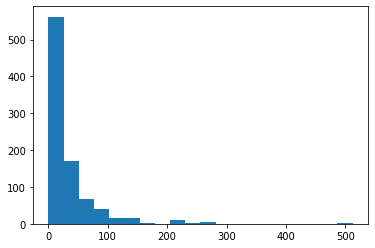

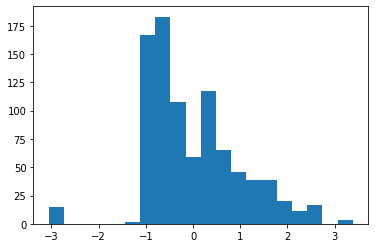

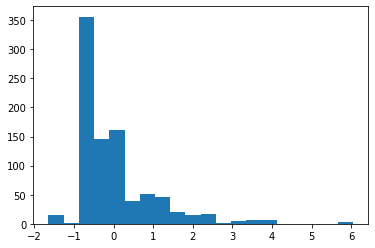

In [112]:
# Distribution Transformation: Scale()

titanic['fare_log'] = preprocessing.scale(np.log(titanic['fare'] + 1))
titanic['fare_sqrt'] = preprocessing.scale(np.sqrt(titanic['fare']) + 1)

#titanic[['fare', 'fare_sqrt']]

plt.hist(titanic['fare'], bins=20)
plt.show()

plt.hist(titanic['fare_log'], bins=20)
plt.show()

plt.hist(titanic['fare_sqrt'], bins=20)
plt.show()


In [113]:
titanic.fare.max()
titanic[titanic.fare.min() == titanic.fare]
titanic.fare.mean()

32.204207968574636

In [134]:
def outliers_iqr(a):
    Q1, Q3 = np.percentile(a, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    return np.array(np.where(np.logical_or(a > upper_bound, a < lower_bound)))


data = np.array(titanic.fare)
index = outliers_iqr(data)
print(titanic.shape)
#titanic.iloc[1]
titanic.drop(titanic.index[index], inplace=True)
titanic.shape

(891, 15)


(775, 15)

In [136]:
index = outliers_iqr(data)
index

array([[  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]])

In [116]:
# null data는 전처리과정이 필요
#print(titanic.isnull().sum()) 
#print(np.isnan(titanic['age']).sum())

mean = titanic.age.mean()

titanic.age.fillna(mean, inplace=True)
print(np.isnan(titanic['age']).sum())

0


In [117]:
sex_to_int = {'male' : 0, "female" : 1}
titanic['sex']= titanic['sex'].map(sex_to_int)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'fare_log', 'fare_sqrt'],
      dtype='object')

In [118]:
data_for_train = ['pclass','sex','age','sibsp','parch', 'fare_log' ]
data = titanic[data_for_train]

In [119]:
x_train, x_test, y_train, y_test = train_test_split(data, titanic['survived'], test_size = 0.2, random_state = 13)

In [120]:
y_test

149    0
5      0
415    0
476    0
292    0
      ..
387    1
654    0
634    0
4      0
255    1
Name: survived, Length: 155, dtype: int64

In [121]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [122]:
print('score {}'.format(dt.score(x_train,y_train))) #train accuracy

score 0.8209677419354838


In [73]:
# 다양한 기준으로 성능을 평가할 수 있습니다.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred = dt.predict(x_test)
print('test accuracy: {}'.format(accuracy_score(y_test,y_pred))) # test accuracy
print('test precision: {}'.format(precision_score(y_test,y_pred))) # test precision
print('test recall: {}'.format(recall_score(y_test,y_pred))) # test recall
print('test f1_measure: {}'.format(f1_score(y_test,y_pred)))

print()

# numpy 활용해서 구해보기 잠깐 문제 !! (!!)
precision = np.sum(y_test*y_pred)/np.sum(y_pred)
recall = np.sum(y_test*y_pred)/np.sum(y_test)
f1_measure = 2* (precision * recall) / (precision + recall)

print('test accuracy(numpy ver.) :', np.mean(np.equal(y_test,y_pred)))      # 정확한 의미는 
print('test precision(numpy ver.) :',precision ) # 생각이 가물가물
print('test recll(numpy ver.)', recall)       # 그럼에도 공부를 ... 
print('test f1_measure(numpy ver.): {}'.format(f1_measure))


#precision(정밀도) : prediction(예상)이 1일 때, 실제로 1일 확률 (살아있다고 예상했을 때, 살아 있을 확률)
#recall(재현율) : 실제 1일때, prediction(예상)이 1일 확률 
#f1_measure(f_measure) : precision과 recall의 조화평균  

test accuracy: 0.8258064516129032
test precision: 0.8076923076923077
test recall: 0.711864406779661
test f1_measure: 0.7567567567567568

test accuracy(numpy ver.) : 0.8258064516129032
test precision(numpy ver.) : 0.8076923076923077
test recll(numpy ver.) 0.711864406779661
test f1_measure(numpy ver.): 0.7567567567567568


In [74]:
print(y_test.shape)
print(y_pred.shape)

(155,)
(155,)


In [75]:
# test someone
# data_for_train = ['pclass','sex','age','sibsp','parch', 'fare' ]
jane = np.array([1,0,60,0,0,1])
liam = np.array([2,2,40,1,4,1])

pred = dt.predict([jane])

print(pred) # 1 : survived

print(dt.predict_proba([jane]))


[0]
[[0.90595611 0.09404389]]


In [76]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt,
    out_file = "titanic.dot",
    feature_names = ['pclass','sex','age','sibsp','parch', 'fare' ],
    class_names = ['unsurvived', 'survived']
)

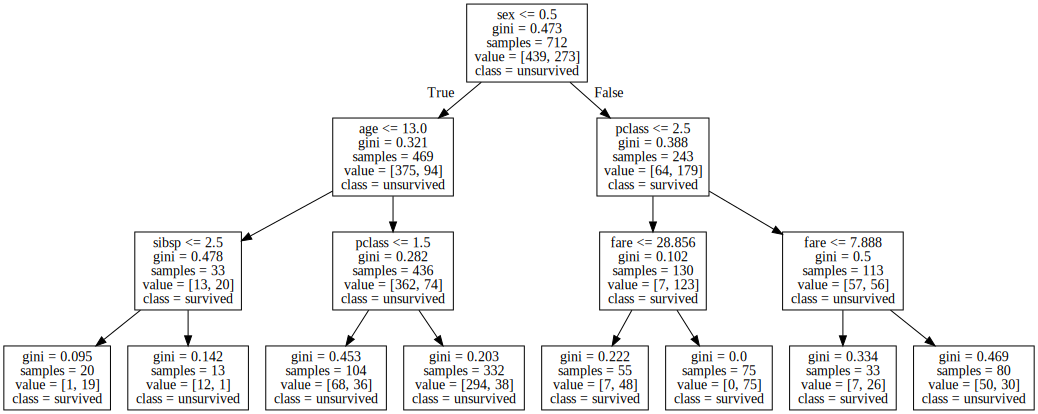

In [35]:
# 그림도 볼 수 있습니다. 

import graphviz
with open('titanic.dot') as f:
    dot_graph = f.read()
dot=graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory = './', cleanup=True)

dot
